## 1. Regression Test

**Why?: To understand the linear relationship b/w 2 quantitative variables.**

In [1]:
experience=[1,2,3,4,5,6,7,8,9,10]
salary= [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Hypothesis formulation

H0: There is no linear assosiation between experiance and salary<br>
Ha: There is linear assosiation between experiance and salary. [Statistical significant]

Level of Significance= 10%

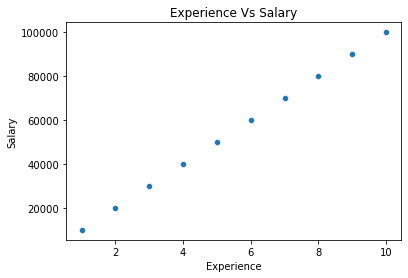

In [3]:
sns.scatterplot(experience, salary)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience Vs Salary')
plt.show()

In [4]:
import statsmodels.formula.api as smf

In [5]:
salary_data=pd.DataFrame(data={'Experience':experience,'Salary':salary})
salary_data

,Experience,Salary
0,1,10000
1,2,20000
2,3,30000
3,4,40000
4,5,50000
5,6,60000
6,7,70000
7,8,80000
8,9,90000
9,10,100000


In [6]:
linear_model=smf.ols(formula='Salary~Experience',data=salary_data).fit()

In [7]:
linear_model.pvalues

Intercept      6.351819e-01
Experience    1.145302e-122
dtype: float64

###  Observation:

At 10% level of significance, I am rejecting the Null Hypothesis and can say that Salary and Experiance is having linear assosiation.

## 2. Chi-Square Test

**Why? : To understand the assosiation between 2 qualitative variables**

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [9]:
tips_data=sns.load_dataset(name='tips')
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Hypothesis formulation:

H0: There is no significant assosiation between Sex and Smokers.<br>
Ha: There is a significant assosiation between Sex and Smokers.

Level of significance: 10%

In [10]:
observed_table=pd.crosstab(index=tips_data['sex'],columns=tips_data['smoker'])
observed_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [11]:
from scipy import stats

In [12]:
chi_square_test_val, p_val, dof, expected_table=stats.chi2_contingency(observed=observed_table) #Chi-square test of independence of variables in a contingency table.

In [13]:
print('**********************************************')
print('Chi-square Test:', chi_square_test_val)
print("P-value:",p_val)
print('Degrees of freedom:',dof)
print('Expected Table:\n',expected_table)
print('**********************************************')

**********************************************
Chi-square Test: 0.008763290531773594
P-value: 0.925417020494423
Degrees of freedom: 1
Expected Table:
 [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]
**********************************************


In [14]:
if p_val<0.10:
    print('We can reject the null hypothesis and can claim that there is no significant assosiation between Sex and Smokers.')
else:
    print(' We cannot reject the null hypothesis and claim that there is a significant assosiation between Sex and Smokers.')

 We cannot reject the null hypothesis and claim that there is a significant assosiation between Sex and Smokers.


## 3. t- Test

* 1 Sample t test
* 2 Sample t test
* ANOVA
* Paired t test

### 1 Sample t- Test

In [15]:
ages=[20,40,50,40,30,50,40,30,45,60,40,18,30,60,40,30,50,40,50,60,30,27,70,48,60,50, 25, 45, 40,40]
len(ages)

30

In [18]:
np.mean(ages)

41.93333333333333

In [19]:
random_samp=np.random.choice(a=ages, size=5) #Generates a random sample from a given 1-D array
random_samp

array([45, 40, 50, 27, 40])

In [20]:
np.mean(random_samp)

40.4

### Hypothesis formulation:

H0: The average age og the users is 40. (There is no significant difference with respect to the population avg ans sample avg)<br>
Ha: It is not 40.(There is significant difference with respect to the population avg ans sample avg)

Level of significance: 5%

In [21]:
t_test_val, p_val=stats.ttest_1samp(a=random_samp, popmean=42) #Calculate the T-test for the mean of ONE group of scores.

In [22]:
p_val

0.6974916305426404

In [31]:
#Level if significance - 5%. ie, At 10% level of significance, do we reject ot not reject?
if p_val<0.05:
    print('We can reject the Null Hypothesis and we can claim that there is a significant difference in the population mean and sample mean')
else:
    print('We do not reject the Null Hypothesis and we can claim that there is no significant difference in the population mean and sample mean')

We do not reject the Null Hypothesis and we can claim that there is no significant difference in the population mean and sample mean


### 2 Sample t- Test

In [25]:
covishield_reaction_time = [48,50,24,24,24,50]
covaxin_reaction_time    = [0,0,2,0,2,0]

In [26]:
np.mean(covishield_reaction_time)

36.666666666666664

In [27]:
np.mean(covaxin_reaction_time)

0.6666666666666666

### Hypothesis formulation

H0: There is no significant difference in the average reaction time of covishield and covaxin<br>
Ha: There is a significant difference in the average reaction time of covishield and covaxin

Level of significance=5%

In [30]:
_,pval=stats.ttest_ind(a = covishield_reaction_time,b = covaxin_reaction_time) #Calculate the T-test for the means of *two independent* samples of scores.
pval

8.582002062447786e-05

In [32]:
#Level if significance - 5%. ie, At 1% level of significance, do we reject ot not reject?
if pval<0.05:
    print('We reject the Null Hypothesis and we can claim that there is a significant difference in the average reaction time of covishield and covaxin')
else:
    print('We do not reject the Null Hypothesis and we can claim that there is no significant difference in the average reaction time of covishield and covaxin')

We reject the Null Hypothesis and we can claim that there is a significant difference in the average reaction time of covishield and covaxin


### Paired t- Test

In [33]:
preweightloss_program  = [110,100,120,105,100,110,99,120,110,100]
postweightloss_program = [80,78,90,89,88,90,80,80,85,70]

In [34]:
np.mean(preweightloss_program)

107.4

In [35]:
np.mean(postweightloss_program)

83.0

### Hypothesis formulation:

H0: There is no significant difference in the average weights before and after the weighloss program<br>
Ha: There is a significant difference in the average weights before and after the weighloss program

Level of significance=5%

In [36]:
_,pval = stats.ttest_rel(a = preweightloss_program, b = postweightloss_program) #Calculate the t-test on TWO RELATED samples of scores, a and b.
pval

6.389963390670724e-06

In [37]:
#Level if significance - 5%. ie, At 5% level of significance, do we reject ot not reject?
if pval<0.05:
    print('We reject the Null Hypothesis and we can claim that there is a significant difference in the average weights before and after the weighloss program')
else:
    print('We do not reject the Null Hypothesis and we can claim that there is no significant difference in the average weights before and after the weighloss program')

We reject the Null Hypothesis and we can claim that there is a significant difference in the average weights before and after the weighloss program


### ANOVA

In [ ]:
stats.f_oneway()

## TASK
FORMULATE 2 HYPOTHESIS STATEMENT FOR EACH STATISTICAL TEST along with SCRIPTS. 